# Host - microbiota Interactions Analysis

## Salmo salar mucosal tissue microbiota across functional feed treatments

#### Load libraries

In [1]:
library('dplyr')
library('vegan')
library('ggplot2')
library('ade4')
library('dendextend')
library('grid')
library('ggpubr')

Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘vegan’ was built under R version 4.0.2”
Loading required package: permute

Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 4.0.2”
This is vegan 2.5-7

Warning message:
“package ‘ggplot2’ was built under R version 4.0.2”
Warning message:
“package ‘ade4’ was built under R version 4.0.2”
Warning message:
“package ‘dendextend’ was built under R version 4.0.2”
Registered S3 method overwritten by 'dendextend':
  method     from 
  rev.hclust vegan


---------------------
Welcome to dendextend version 1.15.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: 

### Read in the data - qPCR data, UniFrac, PICRUSt2 KO and MetaCyc

In [2]:
innateMan <- readRDS('/Users/jakebledsoe/Desktop/NCWMAC\ Projects/Functional\ Feed\ Study/qPCR/Innate_ManhattanDist.RDS')
wUniFrac <- readRDS('/Users/jakebledsoe/Desktop/NCWMAC\ Projects/Functional\ Feed\ Study/MicroAnalysis/NCWMAC_Micro/fish_weightedUniFrac_Dist.RDS')
uwUniFrac <- readRDS('/Users/jakebledsoe/Desktop/NCWMAC\ Projects/Functional\ Feed\ Study/MicroAnalysis/NCWMAC_Micro/fish_unweightedUniFrac_Dist.RDS')

picrust <- read.table('PICRUST/PICRUST2/KO_metagenome_out/pred_metagenome_unstrat.tsv', header=TRUE)
row.names(picrust) <- picrust$function.
picrust$function. <- NULL

picrustPaths <- read.table('PICRUST/PICRUST2/pathways_out/path_abun_unstrat.tsv', header=TRUE)
row.names(picrustPaths) <- picrustPaths$pathway
picrustPaths$pathway <- NULL

### Ordinate - MDS/PCoA on micro dist data, and RDA/PCA on function/pathway data

In [3]:
addw <- !(is.euclid(wUniFrac))
pcoa.wUniFull <- cmdscale(wUniFrac, k = nrow(as.matrix(wUniFrac))-1, eig = TRUE, add = addw)
adduw <- !(is.euclid(uwUniFrac))
pcoa.uwUniFull <- cmdscale(uwUniFrac, k = nrow(as.matrix(uwUniFrac))-1, eig = TRUE, add = adduw)

#### PCA analysis and plotting of PICRUSt2 Inferred Functions

In [4]:
picrustRDA <- rda(t(picrust))
picrustPathRDA <- rda(t(picrustPaths))

In [5]:
tiff('Figures/Manuscript/FunctionPCAPlots.tiff', res=300, units='in', width=8, height=7)
par(mfrow=c(2,1), cex=0.9)
par(mai=c(0.8,0.8,0.2,0.2))

suppressWarnings(biplot(picrustRDA,
                        scaling=1,
                        display='sites',
                        type = "text", 
                        main = "PCA of KO Functions"))


suppressWarnings(biplot(picrustPathRDA,
                        scaling=1,
                        display='sites',
                        type = "text", 
                        main = "PCA of MetaCyc Pathways"))
text(grconvertX(.03, "ndc", "user"), grconvertY(.975, "ndc", "user"), "A", cex=1.25, col="black", font=2,xpd=NA)
text(grconvertX(.03, "ndc", "user"), grconvertY(.475, "ndc", "user"), "B", cex=1.25, col="black", font=2,xpd=NA)

dev.off()

pdf 
  2

#### Make the style of GE and micro row names match

In [6]:
innateNameDF <- data.frame(OrigName = row.names(as.matrix(innateMan)))
innateNameDF <- bind_cols(innateNameDF, tidyr::separate(innateNameDF, OrigName, c('Tissue', 'Tank', 'Fish'), '_'))
innateNameDF$NewName <- paste0(innateNameDF$Tank,
                              '_',
                              innateNameDF$Fish,
                              '_',
                              innateNameDF$Tissue)
innateNameDF$NewName

innateMan1 <- as.matrix(innateMan)
colnames(innateMan1) <- innateNameDF$NewName[match(colnames(innateMan1), innateNameDF$OrigName)]
rownames(innateMan1) <- innateNameDF$NewName[match(rownames(innateMan1), innateNameDF$OrigName)]
innateMan1 <- as.matrix(innateMan1)
head(innateMan1)

[1] "T10_F1_Gut"  "T18_F2_Gut"  "T10_F2_Gut"  "T18_F3_Gut"  "T10_F3_Gut" 
  [6] "T17_F1_Gut"  "T17_F2_Gut"  "T17_F3_Gut"  "T18_F1_Gut"  "T14_F3_Gut" 
 [11] "T16_F1_Gut"  "T16_F2_Gut"  "T16_F3_Gut"  "T20_F1_Gut"  "T14_F1_Gut" 
 [16] "T20_F2_Gut"  "T14_F2_Gut"  "T20_F3_Gut"  "T21_F1_Gut"  "T21_F2_Gut" 
 [21] "T19_F1_Gut"  "T21_F3_Gut"  "T13_F1_Gut"  "T19_F2_Gut"  "T13_F2_Gut" 
 [26] "T19_F3_Gut"  "T13_F3_Gut"  "T23_F3_Gut"  "T24_F2_Gut"  "T22_F1_Gut" 
 [31] "T24_F3_Gut"  "T22_F2_Gut"  "T22_F3_Gut"  "T23_F1_Gut"  "T23_F2_Gut" 
 [36] "T10_F1_Gill" "T18_F2_Gill" "T10_F2_Gill" "T18_F3_Gill" "T10_F3_Gill"
 [41] "T17_F1_Gill" "T17_F2_Gill" "T17_F3_Gill" "T18_F1_Gill" "T14_F3_Gill"
 [46] "T16_F1_Gill" "T16_F2_Gill" "T16_F3_Gill" "T20_F1_Gill" "T14_F1_Gill"
 [51] "T20_F2_Gill" "T14_F2_Gill" "T20_F3_Gill" "T21_F1_Gill" "T21_F2_Gill"
 [56] "T19_F1_Gill" "T21_F3_Gill" "T13_F1_Gill" "T19_F2_Gill" "T13_F2_Gill"
 [61] "T19_F3_Gill" "T13_F3_Gill" "T23_F3_Gill" "T24_F1_Gill" "T24_F2_Gill"
 [66] "T22_F1_Gill" "T24_F3_Gill" "T22_F2_Gill" "T22_F3_Gill" "T23_F1_Gill"
 [71] "T23_F2_Gill" "T10_F1_Skin" "T18_F2_Skin" "T10_F2_Skin" "T18_F3_Skin"
 [76] "T17_F1_Skin" "T17_F2_Skin" "T17_F3_Skin" "T18_F1_Skin" "T14_F3_Skin"
 [81] "T16_F1_Skin" "T16_F2_Skin" "T16_F3_Skin" "T20_F1_Skin" "T14_F1_Skin"
 [86] "T20_F2_Skin" "T14_F2_Skin" "T20_F3_Skin" "T21_F1_Skin" "T21_F2_Skin"
 [91] "T19_F1_Skin" "T21_F3_Skin" "T13_F1_Skin" "T19_F2_Skin" "T13_F2_Skin"
 [96] "T19_F3_Skin" "T13_F3_Skin" "T23_F3_Skin" "T24_F1_Skin" "T24_F2_Skin"
[101] "T24_F3_Skin" "T22_F2_Skin" "T22_F3_Skin" "T23_F1_Skin" "T23_F2_Skin"

,T10_F1_Gut,T18_F2_Gut,T10_F2_Gut,T18_F3_Gut,T10_F3_Gut,T17_F1_Gut,T17_F2_Gut,T17_F3_Gut,T18_F1_Gut,T14_F3_Gut,⋯,T19_F3_Skin,T13_F3_Skin,T23_F3_Skin,T24_F1_Skin,T24_F2_Skin,T24_F3_Skin,T22_F2_Skin,T22_F3_Skin,T23_F1_Skin,T23_F2_Skin
T10_F1_Gut,0.000000,5.591507,8.333035,6.151715,8.877981,8.252441,10.550998,5.849693,15.65829,8.67359,⋯,30.30757,28.22147,31.60807,31.78952,31.33267,31.07468,27.38269,28.46770,30.80629,31.22000
T18_F2_Gut,5.591507,0.000000,13.732515,8.884286,13.657339,10.691875,14.469711,9.537051,21.14958,11.60949,⋯,34.36546,32.27936,35.66596,35.84741,35.39055,35.13256,31.44058,32.52558,34.86417,35.27788
T10_F2_Gut,8.333035,13.732515,0.000000,7.906760,7.152642,9.469389,11.443254,8.380148,10.11267,11.28721,⋯,29.10024,27.20332,27.44460,27.62605,27.16920,26.91121,26.13676,27.56415,29.56100,30.89401
T18_F3_Gut,6.151715,8.884286,7.906760,0.000000,5.883145,4.125055,6.958379,7.902399,15.82908,11.62853,⋯,29.84249,27.94557,29.00638,29.18783,28.73098,28.47299,26.87901,28.30641,30.30325,31.63626
T10_F3_Gut,8.877981,13.657339,7.152642,5.883145,0.000000,4.300701,5.823690,9.725947,13.20885,15.28713,⋯,25.22863,23.33171,25.16038,25.34182,24.88497,24.62698,22.26515,23.69255,25.68939,27.02240
T17_F1_Gut,8.252441,10.691875,9.469389,4.125055,4.300701,0.000000,4.880388,8.637168,17.01255,13.05769,⋯,28.58336,26.68644,28.75166,28.93310,28.47625,28.21826,25.61988,27.04727,29.04412,30.37713


In [7]:
wUniFracMat <- as.matrix(wUniFrac)
head(wUniFracMat)
uwUniFracMat <- as.matrix(uwUniFrac)
head(uwUniFracMat)

,T1_F1_Gill,T1_F1_Gut,T1_F1_Skin,T1_F2_Gill,T1_F2_Gut,T1_F2_Skin,T1_F3_Gill,T1_F3_Gut,T1_F3_Skin,T10_F1_Gill,⋯,T8_F2_Skin,T8_F3_Skin,T9_F1_Gill,T9_F1_Gut,T9_F1_Skin,T9_F2_Gill,T9_F2_Gut,T9_F2_Skin,T9_F3_Gill,T9_F3_Skin
T1_F1_Gill,0.0000000,0.7113914,0.3541968,0.3582785,0.5545640,0.5751363,0.3107022,0.9430213,0.3267998,0.3457982,⋯,0.3735535,0.3549265,0.3058580,0.7275243,0.4544017,0.2372656,0.5730438,0.3774668,0.4146882,0.4040473
T1_F1_Gut,0.7113914,0.0000000,0.7049051,0.6559080,0.5549310,0.7787596,0.6982787,0.7591374,0.6559712,0.6461658,⋯,0.6964653,0.6496856,0.6680486,0.3667498,0.6980348,0.6745372,0.5005015,0.7114861,0.5791271,0.7324036
T1_F1_Skin,0.3541968,0.7049051,0.0000000,0.3052076,0.5839760,0.5400621,0.3180695,0.9423322,0.2554049,0.3225455,⋯,0.3032774,0.3225391,0.3042025,0.7097552,0.2983615,0.3197318,0.5701988,0.2458082,0.3838270,0.2765058
T1_F2_Gill,0.3582785,0.6559080,0.3052076,0.0000000,0.5505535,0.4581333,0.2711215,0.9182264,0.2208102,0.2667234,⋯,0.2816871,0.3348506,0.2319297,0.6448532,0.3895989,0.3020460,0.5139600,0.3453751,0.3209548,0.3697617
T1_F2_Gut,0.5545640,0.5549310,0.5839760,0.5505535,0.0000000,0.7229501,0.5895715,0.8997191,0.5450920,0.5385739,⋯,0.5765349,0.4922262,0.5597803,0.6082525,0.5857566,0.5578572,0.4194220,0.5731436,0.4440361,0.6025667
T1_F2_Skin,0.5751363,0.7787596,0.5400621,0.4581333,0.7229501,0.0000000,0.5268982,0.9409745,0.5174604,0.5146102,⋯,0.5206756,0.5650958,0.4944752,0.7724026,0.5541262,0.5171938,0.6904808,0.5452315,0.5624206,0.5567572


,T1_F1_Gill,T1_F1_Gut,T1_F1_Skin,T1_F2_Gill,T1_F2_Gut,T1_F2_Skin,T1_F3_Gill,T1_F3_Gut,T1_F3_Skin,T10_F1_Gill,⋯,T8_F2_Skin,T8_F3_Skin,T9_F1_Gill,T9_F1_Gut,T9_F1_Skin,T9_F2_Gill,T9_F2_Gut,T9_F2_Skin,T9_F3_Gill,T9_F3_Skin
T1_F1_Gill,0.0000000,0.8476948,0.6853122,0.5851677,0.8860419,0.6216477,0.5702832,0.9379290,0.6422427,0.6082071,⋯,0.6442004,0.6996818,0.6052907,0.8114053,0.7462678,0.6579245,0.7827499,0.7196560,0.7164841,0.6596906
T1_F1_Gut,0.8476948,0.0000000,0.8323922,0.8576764,0.6573736,0.8622004,0.8152566,0.8121154,0.8298944,0.8769560,⋯,0.8823453,0.7755927,0.8004922,0.6555017,0.8468356,0.8308036,0.6718411,0.8344273,0.7445480,0.8306213
T1_F1_Skin,0.6853122,0.8323922,0.0000000,0.6591549,0.8729921,0.6612168,0.6492192,0.9397733,0.5892532,0.6435078,⋯,0.5956645,0.7014195,0.6104286,0.8531007,0.6571831,0.6281409,0.7692826,0.6356736,0.6939064,0.6008577
T1_F2_Gill,0.5851677,0.8576764,0.6591549,0.0000000,0.8854640,0.6409117,0.5877302,0.9294237,0.6213691,0.5680828,⋯,0.5850654,0.7116367,0.6064602,0.8528319,0.7095975,0.6210710,0.8005867,0.6944463,0.7023144,0.6440456
T1_F2_Gut,0.8860419,0.6573736,0.8729921,0.8854640,0.0000000,0.9117646,0.8654230,0.8412792,0.8263605,0.8941896,⋯,0.9075845,0.8390690,0.8610948,0.6501064,0.8849837,0.8642522,0.7161129,0.8575055,0.7829982,0.8434487
T1_F2_Skin,0.6216477,0.8622004,0.6612168,0.6409117,0.9117646,0.0000000,0.6318106,0.9621502,0.6276269,0.6138929,⋯,0.6207845,0.7095485,0.6697292,0.8780974,0.6991548,0.6245557,0.8360151,0.7036784,0.7534543,0.6781886


#### Filter and sort data to ensure sample matched data for qPCR and microbiota results

In [8]:
sampKeep <- rownames(wUniFracMat) %in% innateNameDF$NewName
wUniFracMatFinal <- wUniFracMat[sampKeep,sampKeep]
uwUniFracMatFinal <- uwUniFracMat[sampKeep,sampKeep]
sampKeep2 <- rownames(innateMan1) %in% rownames(wUniFracMat)
innateManMatFinal <- innateMan1[sampKeep2,sampKeep2]

str(as.dist(wUniFracMatFinal))
str(as.dist(uwUniFracMatFinal))
str(as.dist(innateManMatFinal))

 'dist' num [1:5151] 0.992 0.394 0.295 0.958 0.262 ...
 - attr(*, "Labels")= chr [1:102] "T10_F1_Gill" "T10_F1_Gut" "T10_F1_Skin" "T10_F2_Gill" ...
 - attr(*, "Size")= int 102
 - attr(*, "call")= language as.dist.default(m = wUniFracMatFinal)
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 'dist' num [1:5151] 0.928 0.653 0.577 0.917 0.634 ...
 - attr(*, "Labels")= chr [1:102] "T10_F1_Gill" "T10_F1_Gut" "T10_F1_Skin" "T10_F2_Gill" ...
 - attr(*, "Size")= int 102
 - attr(*, "call")= language as.dist.default(m = uwUniFracMatFinal)
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 'dist' num [1:5151] 5.59 8.33 6.15 8.88 8.25 ...
 - attr(*, "Labels")= chr [1:102] "T10_F1_Gut" "T18_F2_Gut" "T10_F2_Gut" "T18_F3_Gut" ...
 - attr(*, "Size")= int 102
 - attr(*, "call")= language as.dist.default(m = innateManMatFinal)
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE


In [9]:
sortUniFrac <- sort_dist_mat(as.dist(wUniFracMatFinal),  by_rows = TRUE, by_cols = TRUE)
sortuwUniFrac <- sort_dist_mat(as.dist(uwUniFracMatFinal),  by_rows = TRUE, by_cols = TRUE)
sortInnateMan <- sort_dist_mat(as.dist(innateManMatFinal), by_rows = TRUE, by_cols = TRUE)

### Run MDS on the dist matrices and plot

In [10]:
set.seed(123)
add <-  !(is.euclid(sortUniFrac))
pcoa.wUni <- cmdscale(sortUniFrac, k = nrow(as.matrix(sortUniFrac))-1, eig = TRUE, add = add)

adduw <-  !(is.euclid(sortuwUniFrac))
pcoa.uwUni <- cmdscale(sortuwUniFrac, k = nrow(as.matrix(sortuwUniFrac))-1, eig = TRUE, add = adduw)

add1 <-  !(is.euclid(sortInnateMan))
pcoa.Man <- cmdscale(sortInnateMan, k = nrow(as.matrix(sortInnateMan))-1, eig = TRUE, add = add1)

#ordiplot(pcoa.wUni, type = "text", main = "wUniFrac PCoA for ASV Data")
#ordiplot(pcoa.uwUni, type = "text", main = "uwUniFrac PCoA for ASV Data")
#ordiplot(pcoa.Man, type = "text", main = "PCoA for GE Data")

### Run procrustes analysis

In [11]:
set.seed(123)
proC2 <- protest(pcoa.wUni, pcoa.Man, scale = TRUE, symmetric = TRUE)
proC2uw <- protest(pcoa.uwUni, pcoa.Man, scale = TRUE, symmetric = TRUE)

tiff('Figures/Manuscript/ProcrustesGEPlot.tiff', res=300, units='in', width=7, height=3)

par(mfrow=c(1,2), cex=0.9)
par(mai=c(0.8,0.8,0.2,0.2),
    mar=c(4,4,1,1))

plot(proC2, kind = 1, type = "text", main ="")
#plot(proC2, kind = 2, type = "text", xlab = 'Sample',  main ="")
plot(proC2uw, kind = 1, type = "text",  main ="")
#plot(proC2uw, kind = 2, type = "text", xlab = 'Sample',  main ="")

text(grconvertX(.012, "ndc", "user"), grconvertY(.92, "ndc", "user"), "A", cex=1.25, col="black", font=2,xpd=NA)
#text(grconvertX(.04, "ndc", "user"), grconvertY(.475, "ndc", "user"), "C", cex=1.25, col="black", font=2,xpd=NA)
text(grconvertX(.512, "ndc", "user"), grconvertY(.92, "ndc", "user"), "B", cex=1.25, col="black", font=2,xpd=NA)
#text(grconvertX(.54, "ndc", "user"), grconvertY(.475, "ndc", "user"), "D", cex=1.25, col="black", font=2,xpd=NA)

dev.off()

proC2
proC2uw

pdf 
  2


Call:
protest(X = pcoa.wUni, Y = pcoa.Man, scale = TRUE, symmetric = TRUE) 

Procrustes Sum of Squares (m12 squared):        0.3833 
Correlation in a symmetric Procrustes rotation: 0.7853 
Significance:  0.001 

Permutation: free
Number of permutations: 999



Call:
protest(X = pcoa.uwUni, Y = pcoa.Man, scale = TRUE, symmetric = TRUE) 

Procrustes Sum of Squares (m12 squared):        0.2709 
Correlation in a symmetric Procrustes rotation: 0.8539 
Significance:  0.001 

Permutation: free
Number of permutations: 999


### Plot with ggplot

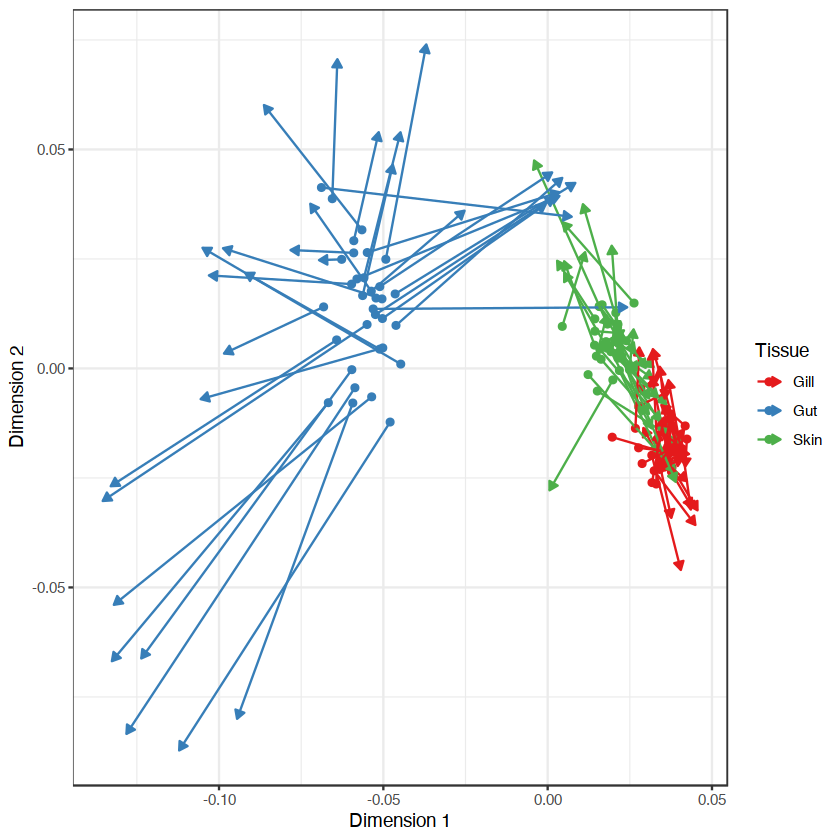

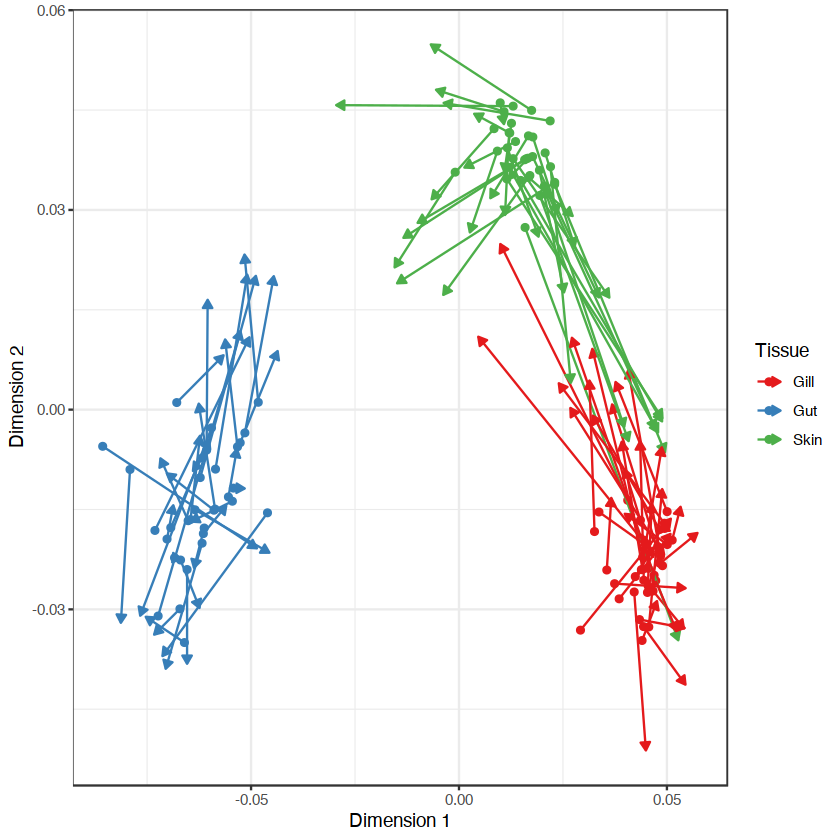

In [12]:
sampLabels <- strsplit(row.names(pcoa.wUni$points), "_") %>% 
                as.data.frame() %>% 
                t %>% 
                data.frame(stringsAsFactors = F) %>% 
                pull(3) 

ctest2 <- data.frame(rda1=proC2$Yrot[,1],
                    rda2=proC2$Yrot[,2],
                    xrda1=proC2$X[,1],
                    xrda2=proC2$X[,2],
                    Tissue=sampLabels)

wGENEpro <- ggplot(ctest2
                 ) + geom_point(aes(x=rda1,
                                    y=rda2,
                                    colour=Tissue)
                               #) + geom_point(aes(x=xrda1,
                                                  #y=xrda2,
                                                  #colour=Tissue,
                                                  #shape=Tissue)
                                             ) + geom_segment(aes(x=rda1,
                                                                  y=rda2,
                                                                  xend=xrda1,
                                                                  yend=xrda2,
                                                                  colour=Tissue),
                                                              arrow=arrow(length=unit(0.2,"cm"), type="closed")
                                                             ) + xlab('Dimension 1'
                                                                      ) + ylab('Dimension 2'
                                                                              ) +scale_color_brewer(palette="Set1"
                                                                                                   ) + theme_bw()
wGENEpro

ctest3 <- data.frame(rda1=proC2uw$Yrot[,1],
                    rda2=proC2uw$Yrot[,2],
                    xrda1=proC2uw$X[,1],
                    xrda2=proC2uw$X[,2],
                    Tissue=sampLabels)

uwGENEpro <- ggplot(ctest3
                 ) + geom_point(aes(x=rda1,
                                    y=rda2,
                                    colour=Tissue)
                               #) + geom_point(aes(x=xrda1,
                                                  #y=xrda2,
                                                  #colour=Tissue,
                                                  #shape=Tissue)
                                             ) + geom_segment(aes(x=rda1,
                                                                  y=rda2,
                                                                  xend=xrda1,
                                                                  yend=xrda2,
                                                                  colour=Tissue),
                                                              arrow=arrow(length=unit(0.2,"cm"), type="closed")
                                                             ) + xlab('Dimension 1'
                                                                      ) + ylab('Dimension 2'
                                                                              ) +scale_color_brewer(palette="Set1"
                                                                                                   ) + theme_bw()
uwGENEpro

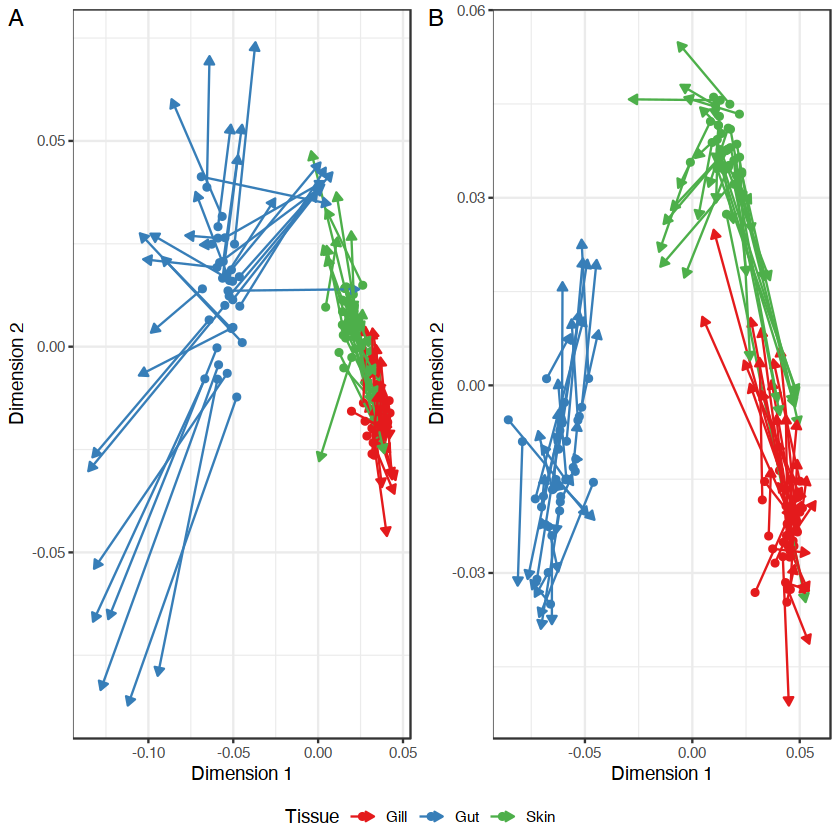

In [15]:
genePro <- ggarrange(wGENEpro,uwGENEpro, ncol=2,common.legend = TRUE,legend='bottom',labels="AUTO")
genePro
ggsave('Figures/Manuscript/geneProcrust.png', width=7, height=4, bg='white')
saveRDS(wGENEpro, 'GeneMicroProPlotWUni.RDS')
saveRDS(uwGENEpro, 'GeneMicroProPlotuWUni.RDS')